# **Recurrent Neural Networks (RNNs)**

As a grand scheme of things, **CNN** is still pretty basic: you have one input and you get one output. **It is a static network.**

The brain consists of billions of neurons, without any single direction. Neurons are not connected in some linear fashion where you have an input and they all just point towards the output. **The neurons in the brain are all connected together, and there are many loops**.

# **Decision process**

A decision made **now** is not based on what you hear or see **now**. When you make a decision, you use past inputs. Example: when you listen to something, you may remember what was said before, so you can think and reason based on past inputs as well.

So it is reasonable to wonder what would happen if you **added feedback loops to an artificial neural network**.


The most basic RNN you can have looks like the image below, where you just **connect the hidden layer back to itself**.

So how does this work?

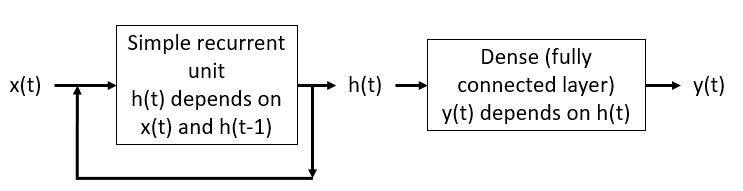

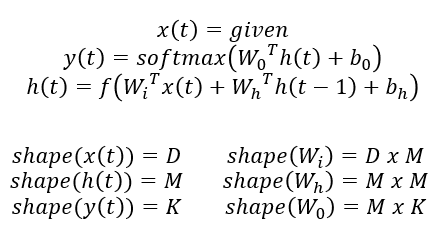

Since the **independent variable here is time**, our three major data variables need to be indexed by time.

- So, we call our input x(t), instead of just X as usual;
- We call our output y(t), instead of just Y as usual;
- And we call the hidden layer value of h(t), instead of just H.

Since x(t) is given, we do not need to calculate it. Since y(t) only depends on h(t), calculating y(t) is as simple as it usually is: **it is just a regular dense layer**. We multiply it by a weight matrix, sum a bias vector and apply some activation function that can be a softmax, sigmoid or etc.

The layer of interest in an **RNN is the hidden layer. To calculate h(t)**, we have both a term that depends on x(t) and a term that depends on h(t-1). As usual, these are just weight matrix multiplications.

Since x(t) is a vector of size D, and h(t) is a vector of size M, we need to set the weight matrices to be consistent with these vectors' sizes. So as usual, W input (Wi) is of size D x M, W hidden (Wh) must be of size M x M, since it connects H(t-1) to h(t), and both of these are of size M.

**Assuming we are doing multiclass classification**, the output y(t) will be of size K and the output weight (Wo) will be of size M x K, as usual.

One way to think of h(t) is that it is just a feature vector, **like it is in a feedforward neural network**, but it also contains a memory of the past via h(t-1).
- Think of h(t-1) as simply a "memory of the past".
- Wh tells us "which memories" to pay attention when making new memories. So, you can think of **W hidden (Wh) as a weight matrix that tells h(t) which parts of h(t-1) are important to remember and which are not**.

# **Unrolling an RNN**

One way to think of an RNN **is to just unroll them in time (image below)**.

```
NOTE: x(t) ⟶ y(t) is now vertical instead of horizontal.
```
You can think of this as just a "static" neural **net**.
- So if we imagine **time going horizontally**, and the neural **network layers going upward**, then we can unroll a neural network.
- This brings us to a really important idea, which is: what if you **do not think of the sequence as a sequence in time, but rather just a static set of inputs**?

So, forget about the fact that this is a sequence for now. Just pretend we are going to input a bunch of X's into this really strange looking neural network.

Well, then we have what is **simply a neural network with shared weights**. 
- We just have a big input: [x(1), x(2), x(3), x(4), ...];
- And we get a big output: [y(1), y(2), y(3), y(4), ...].

So we see that W input (Wi) shows up T times; W hidden (Wh) also shows up T times; and W output (Wo) also shows up T times.

Then, it is a specially designed neural network **where the same weights just keep repeating over and over again**.

You do not have to think of it in terms of time. I**n this case, it is all happening at the same time (in the feedforward vertical neural networks)** with just a weird, strange architecture.

Theoretically, **these weights could also be different weights, such that we did not share the same weights at each stage**.

But **it is more common in the study of RNNs to use the same weights over and over again**.

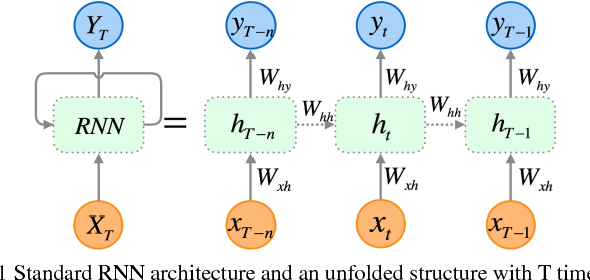

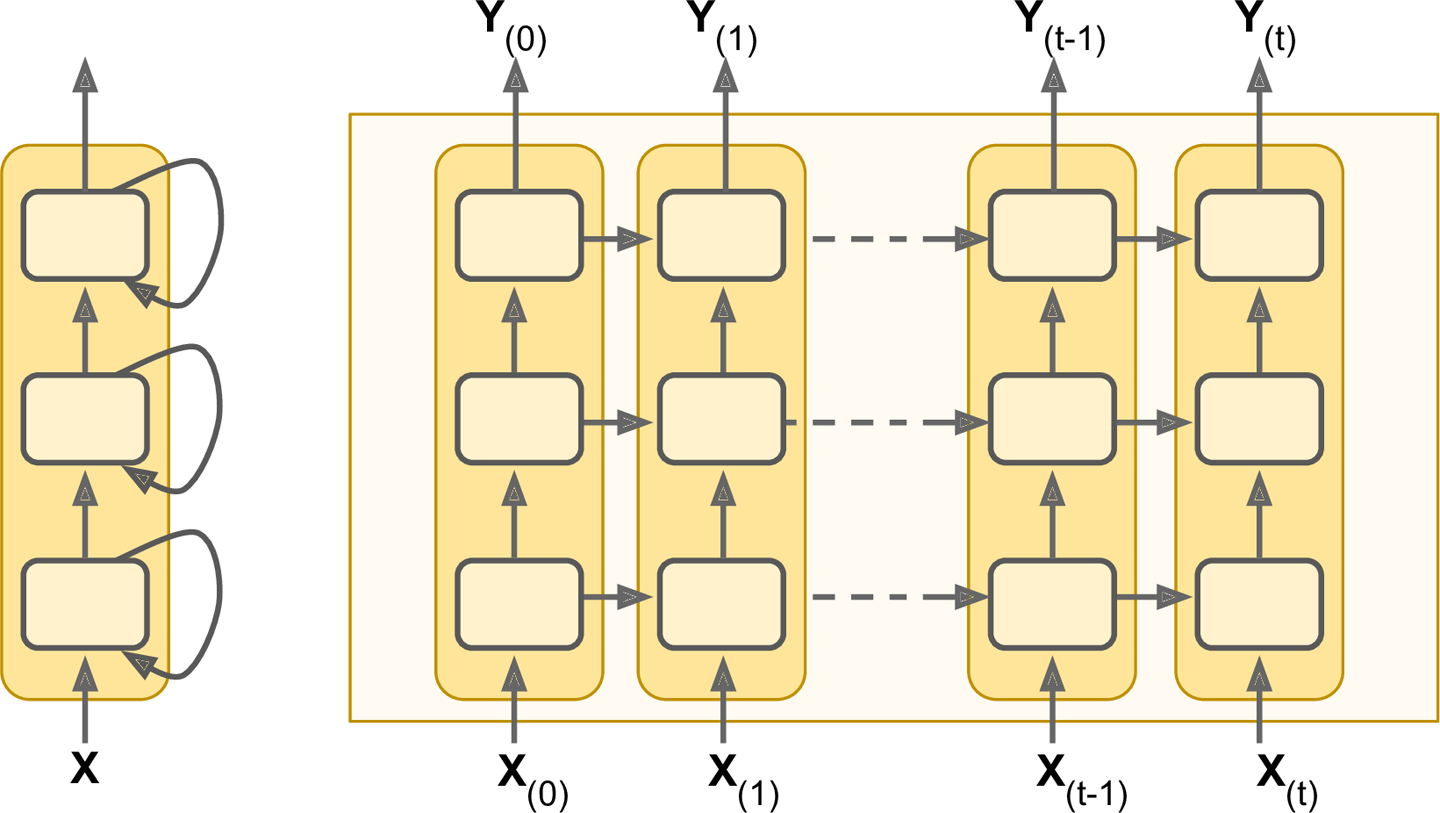

# **feedforward (Dense) Neural Network**

One question that arives is: if you want to classify a sequence, why cannot you just input the entire sequence into a feedforward neural network? Why do we need this special architecture?
- As an example: suppose you have a sequence x(1), ..., x(T). Instead of using an RNN, you decide to concatenate all of X(t) into one big vector.
- If you simply put [x(1), x(2), x(3), x(4), ..., x(T)] into a huge conventional dense neural network, instead of T individual input vectors of size D (case of the RNN), you would have just one big input vector of size T.D.
- Similarly, you would have created different T different h(t) and T different y(t). Then, you would have created all the same variables you had before, except that now they are all concatenated together.
- At the end, you can just unconcatenate the outputs to get back each of the individual y(t) and h(t) if I need them.

# **Numerical calculation (feedforward NN)**

Let's look at what happens if we do this. Suppose:
- T = 20 (sequence length);
- D = 10 (input dimensionality);
- M = 15 (hidden layer size);
- K = 3 (number of output classes).

So, each input vector is of size 10, the hidden layers are of size 15 and the number of output classes is of size 3.
- Input-to-hidden weight (hidden layers matrix) is of size T x D x T x M = 60,000 numbers (60,000 weights in the hidden layers of the ANN);
- Input-to-output weight (input and output layers matrices) is of size T x M x T x K = 18,000 numbers (18,000 weights in the input and output layers of the ANN);
- Total: 78,000 numbers (**Artificial Neural Network comprised of 78,000 weights**).
- Notice that the 78,000 parameters are only the weights: we are not counting the biases terms. So this is a really big fat neural network.

# **Numerical calculation of an RNN (comparison)**

Now, let's look at what happens if we use an RNN. Again, our inputs and hidden layers are of sizes:
- T = 20 (sequence length);
- D = 10 (input dimensionality);
- M = 15 (hidden layer size);
- K = 3 (number of output classes).

Therefore:
- Input-to-hidden weight (input layer matrix) is of size D x M = 10 x 15 = 150 numbers (150 weights in the input layer of the ANN);
- Hidden-to-hidden weight (hidden layers matrix) is of size M x M = 15 x 15 = 225 numbers (225 weights in the hidden layers);
- hidden-to-output weight (output layer matrix) is of size M x K = 15 x 3 = 45 numbers (45 weights in the output layer);
- Total: 150 + 225 + 45 = 420 numbers (**Artificial Neural Network comprised of 420 weights**).
- Notice that we have 78,000 weights when using a dense NN.

# **Why to use an RNN instead of a dense ANN**

A feedforward artificial neural network is capable of representing any function.
- In fact, it has been **proven that a feedforward ANN can approximate any function**.
- So, the feedforward neural network is the **most general function approximator**.
- Then, in theory, we actually have no need for RNNs, since feedforward ANNs should work just fine.

Unfortunately, as promising as that sounds, the ANNs do not work that well in practice.
- The reason is that there are over parameterized or, in other words, **there are too many parameters**.
- Further, there is no structure: you have **tons of weights where everything is connected to everything, which makes the model very flexible but incapable of learning** anything.
- Similar story when **comparing ANNs with CNNs**.

**With RNNs, you have structure: you are taking into account the structure of the data**, which allows you to have a fraction of the weights and allows you to use the weights you do have in a more intelligent way.
- You take advantage of the structure of the data **by using the same weigths at each iteration of the sequence**.

There is also another big problem with the feedforward neural network, other than the fact that it has too many parameters: **its inputs should be of constant size**.
- Feedforward neural networks must have a constant size;
- Not effective, since we can easily think of realistic sequences that do not have constant sizes:

```
|J|A|G|G|E|D|
|A|R|R|A|Y|S|
|A|R|E|
|C|O|N|F|U|S|I|N|G|
```
- For example: words in sentences; 
- Audio signals from a person saying words present some words that are longer than others; 
- Number of sentences in a document.

**Most problems in NLP deal with variable length sequences**.

In deep learning, dealing with these sequences is actually hard.

If you are building an RNN in Keras or if you are using one of the built-in RNN cells in Tensorflow, you are going to be dealing with constant-length sequences.
- **RNN cells in Keras and Tensorflow require constant-length sequences**.

There are a few advantages to this: 
- It is much easier to represent your data: data is always rectangularly shaped;
- Your input data is always going to be of size N x T x D, where N = number of samples; T = sequence's length; and D = vector's dimension (input feature dimension).
- This makes it easier to **store your data in an NumPy array**.
- NumPy arrays do not work when you have variable length sequences (when T is not constant).

When T is not constant, we cannot store data into NumPy arrays, so we have to use lists. So, with constant-length sequences, we can always represent our data with NumPy arrays, which means it will have a **rectangular shape. Then, we could do Batch operations on it, instead of having to loop over everything** (as we would have if the length was always changing).
- Another advantage of this is that it is easier to write code.



# **Disadvantages of working with constant-length sequences**

Despite the advantages of having constant length, there is still one big disadvantage with this method: sometimes, **you have to choose T**.
- You can set **T = size maximum-length sequence in training set**.

There are two major problems with this chosen of T:
- If there is a sequence in your test set that is longer than T, your neural network will not be able to handle it, **so you will be forced to cut-off part of the sequence to make it fit into your neural network (you will truncate the sentence, as in the CNN example)**.
- Now that all sequences will be forced to have the same length as the maximum sequence, you can imagine that **very long sentences are rare** (long tail). Then, you might have a few sentences that are 50 words long, but most sentences are maybe five to 10 words long.
- All sequences, even those that are much shorter, will be forced to have size T. **They will be padded with zeros**.

Suppose we have a sentence with size 50 words, and this is the maximum-length. **Most sentences are short, with size up to 5**. Even these short sentences will have to be padded with 45 zeros to fit 50-sized arrays.
- That means you are going to have to do 45 matrix multiplications that you do not actually have to do. It represents a lot of extra work and a lot of extra processing time just to multiply a lot of zeros, especially since very long sentences are so rare (waste of space and matrix multiplications).

Since Keras only works with constat-sized sequences, this is what we will be using, but you will want to keep in mind these limitations. The benefit of simpler code is an acceptable trade-off.


# **Summary**

- We looked at how to incorporate memory into a neural network by making h(t) feedback into itself. We call this layer of a neural network, a **Simple Recurrent Unit or an Elman Unit**.
- Next, we looked at an equivalent representation of a Simple Recurrent Unit, which is an unrolled feedforward neural network with "**shared weights**".
- Playing off of this idea of a flat, static neural network, we then consider the scenario where instead of having a specialized recurrent architecture, we just connected everything from the previous layer to everything in the next layer, forming a huge feedforward neural network. We saw that **this contains a large number of parameters and is not actually useful in the real world compared to an RNN, which takes into account the structure of data**.
- Finally, we noted that another drawback of feedforward networks is that they have fixed-size inputs. Theoretically, RNNs are not limited to fixed size inputs, but ironically, that is still what we end up using anyway due to the limitations of Keras and Tensorflow.